# Notebook 3: Skills Analysis 

### Objective
This notebook is the final step in our analysis of the Google Job Skills dataset. Its purpose is to take the structured data, processed by our AI agent in Notebook 2, and create clear, insightful visualizations. The primary output will be a set of bar charts illustrating the most in-demand technical and soft skills, providing a strong visual summary for the project's portfolio entry.

## 1. Setup and Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast 

# Define the path to our processed data
processed_file_path = '../data/processed/processed_google_jobs.csv'

# Load the dataset
df = pd.read_csv(processed_file_path)

# --- Data Cleaning: Convert string-lists back to actual lists ---

def safe_converter(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError, TypeError):
        return [] 

df['extracted_technical_skills'] = df['extracted_technical_skills'].apply(safe_converter)
df['extracted_soft_skills'] = df['extracted_soft_skills'].apply(safe_converter)

print("Processed data loaded and cleaned successfully.")
print(f"Total jobs in dataset: {len(df)}")
display(df.head())

Processed data loaded and cleaned successfully.
Total jobs in dataset: 1250


,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,full_description,extracted_technical_skills,extracted_soft_skills
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,"Shape, shepherd, ship, and show technical prog...","[AWS, Cloud Computing, SaaS, Cloud Customer En...","[Communication, Problem-solving, Teamwork, Agi..."
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",Drive cross-functional activities in the suppl...,"[DOE, FMEA, Statistics tools, Data analysis, D...","[Teamwork, Agile Methodologies, Problem-solvin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,Collect and analyze data to draw insight and i...,"[R, SAS, Python, SQL]","[Teamwork, Agile Methodologies, Problem-solvin..."
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...","Work one-on-one with the top Android, iOS, and...","[Android, iOS, Java, Kotlin, JavaScript]","[Problem-solving, Communication, Teamwork, Agi..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,Plan requirements with internal customers.\nPr...,"[AWS S3, SQL, Git]","[Teamwork, Agile Methodologies, Problem-solvin..."


## 2. Skill Frequency Analysis

To find the most common skills, we first need to flatten the list of lists from our skill columns into a single, long list for each skill type. 

In [4]:
# --- 1. Flatten the lists ---
all_technical_skills_raw = [skill for sublist in df['extracted_technical_skills'] for skill in sublist if skill]
all_soft_skills_raw = [skill for sublist in df['extracted_soft_skills'] for skill in sublist if skill]

# --- 2. Normalize the Data ---
normalized_tech_skills = [skill.strip().lower() for skill in all_technical_skills_raw]
normalized_soft_skills = [skill.strip().lower() for skill in all_soft_skills_raw]

# --- 3. Convert to pandas Series and get the top 20 value counts ---
tech_skills_series = pd.Series(normalized_tech_skills)
soft_skills_series = pd.Series(normalized_soft_skills)

top_tech_skills = tech_skills_series.value_counts().head(20)
top_soft_skills = soft_skills_series.value_counts().head(20)

print("--- Top 20 Most In-Demand Technical Skills ---")
display(top_tech_skills)
print("\n--- Top 20 Most In-Demand Soft Skills ---")
display(top_soft_skills)

--- Top 20 Most In-Demand Technical Skills ---


sql                      323
python                   244
javascript               131
git                      125
java                     114
google cloud platform    100
google cloud              91
c++                       70
html                      67
google                    64
r                         53
aws s3                    49
css                       43
g suite                   43
go                        41
data analysis             41
paas                      28
iaas                      28
linux                     28
matlab                    27
Name: count, dtype: int64


--- Top 20 Most In-Demand Soft Skills ---


problem-solving          966
communication            892
teamwork                 735
agile methodologies      555
analytical skills        264
project management       243
interpersonal skills     225
leadership               224
organizational skills    174
collaboration            163
strategic thinking       117
attention to detail       94
time management           86
written communication     71
presentation              63
verbal communication      59
influence                 57
relationship building     54
influencing               50
self-starter              50
Name: count, dtype: int64

## 3. Visualization: Top In-Demand Skills

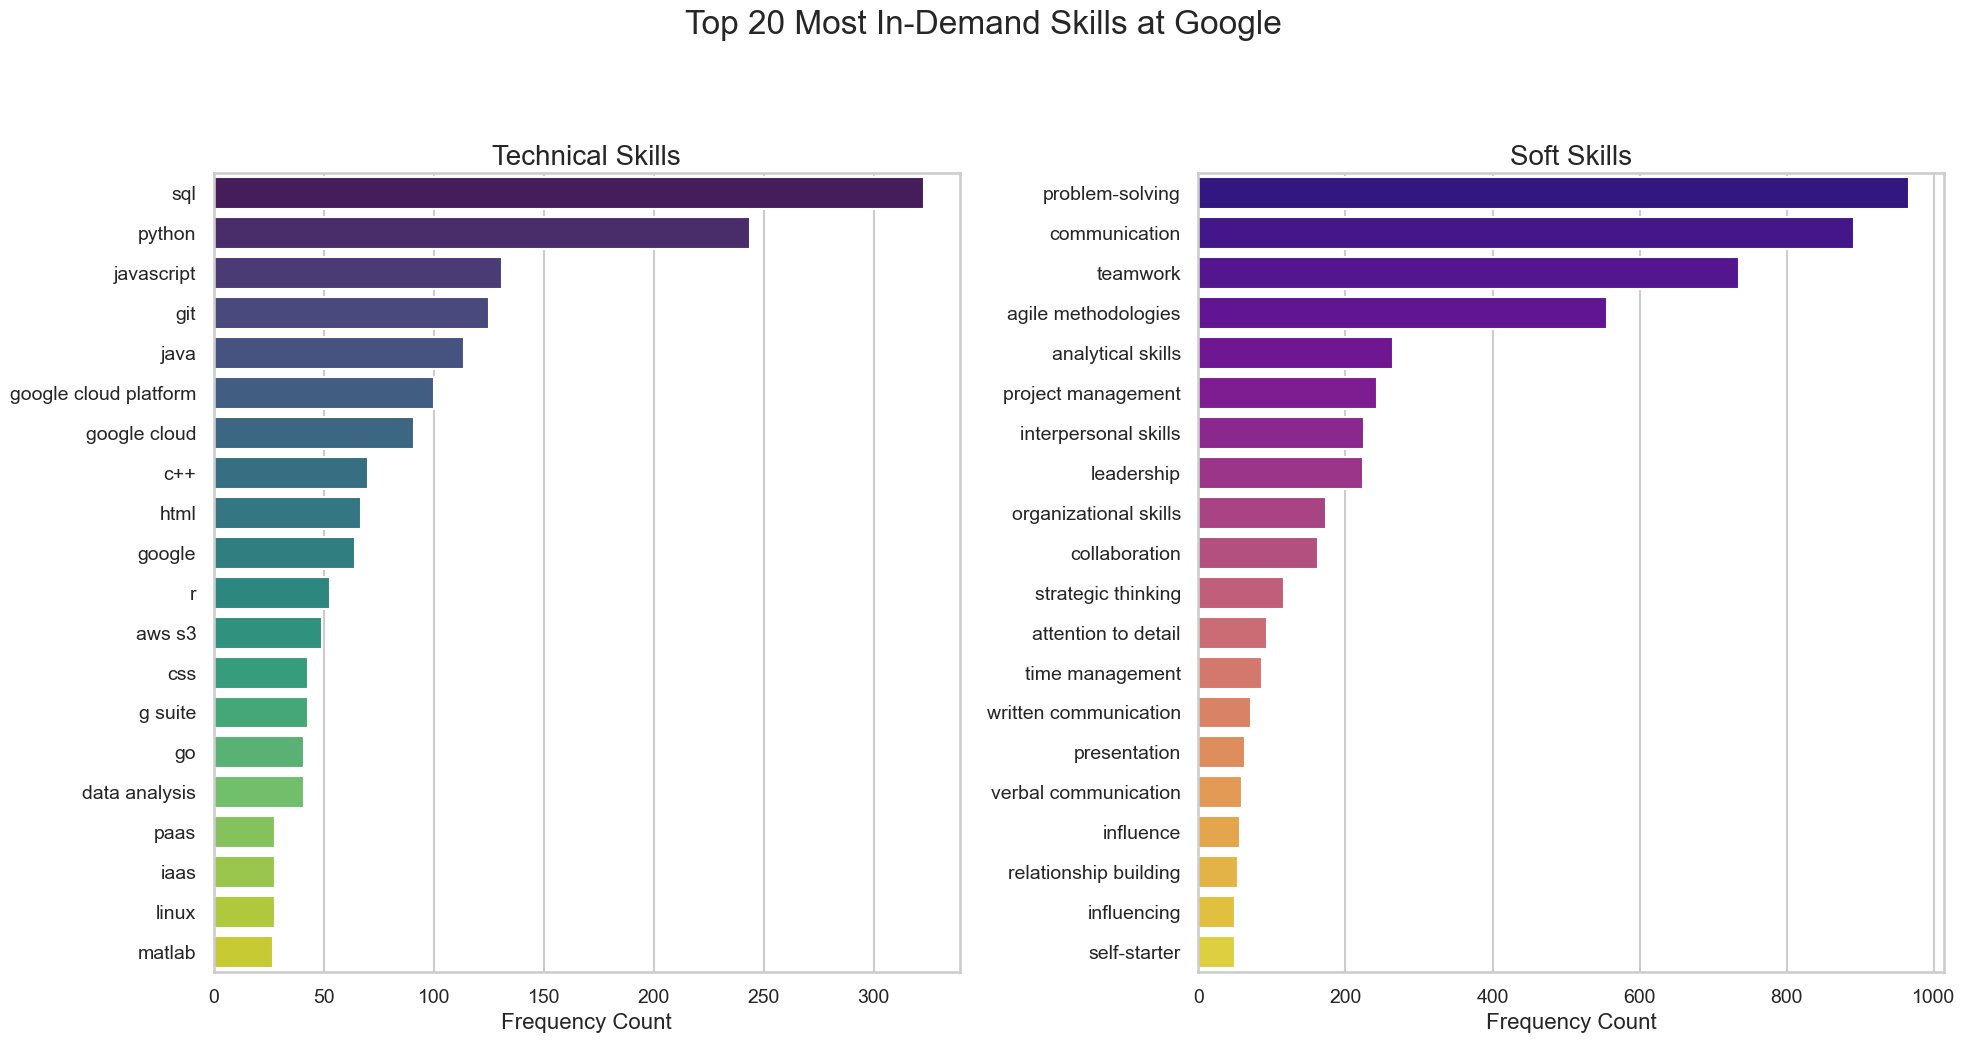

In [5]:
# Set the visual style for the plots
sns.set_theme(style="whitegrid", context="talk")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Top 20 Most In-Demand Skills at Google', fontsize=24, y=1.05)

# Plot for Top Technical Skills
sns.barplot(x=top_tech_skills.values, y=top_tech_skills.index, ax=axes[0], palette='viridis', hue=top_tech_skills.index, dodge=False, legend=False)
axes[0].set_title('Technical Skills', fontsize=20)
axes[0].set_xlabel('Frequency Count', fontsize=16)
axes[0].set_ylabel('') 
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

# Plot for Top Soft Skills
sns.barplot(x=top_soft_skills.values, y=top_soft_skills.index, ax=axes[1], palette='plasma', hue=top_soft_skills.index, dodge=False, legend=False)
axes[1].set_title('Soft Skills', fontsize=20)
axes[1].set_xlabel('Frequency Count', fontsize=16)
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()